In [37]:
# para manipulacion de datos
import numpy as np
import pandas as pd

# para visualizacion de datos
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D

# para interactividad
from ipywidgets import interact

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings("ignore")

# modelo
import joblib

In [2]:
data = pd.read_csv('data.csv')

In [3]:
print('las dimensiones de la tabla son:', data.shape)

las dimensiones de la tabla son: (2200, 8)


In [4]:
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


## EDA. Descripción estadística

In [5]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


## EDA. Contar valores de etiqueta

In [6]:
data['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

## EDA. Comprobacion de valores faltantes

In [7]:
# Mostrar lista de columnas que indican la suma de valore faltantes
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

## EDA. Comprobacion de valores duplicados

In [8]:
# Mostrar un dataframe que indican si hay valore duplicados
duplicados = data[data.duplicated()]
duplicados

,N,P,K,temperature,humidity,ph,rainfall,label


no hay datos duplicados

## EDA. Deteccion de outliers

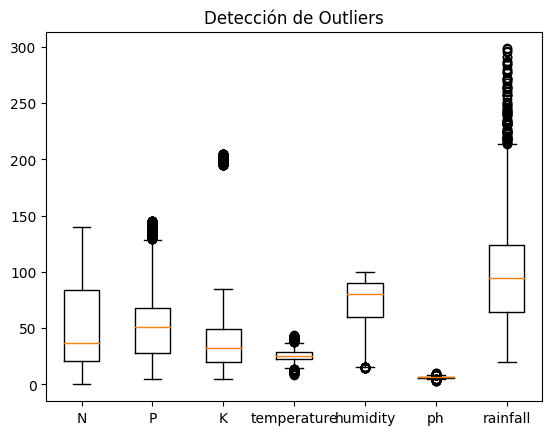

In [9]:
# Asegurarse de que solo se incluyan las columnas numéricas en los cálculos
data_numeric = data.select_dtypes(include=[np.number])

# Calculamos el Q1 y Q3 para cada columna numérica
Q1 = data_numeric.quantile(0.25)
Q3 = data_numeric.quantile(0.75)

# Calculamos el rango intercuartílico (IQR) para cada columna numérica
IQR = Q3 - Q1

# Definimos los límites superior e inferior para determinar los outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtramos los outliers en cada columna numérica
df_filtrado = data_numeric[(data_numeric >= limite_inferior) & (data_numeric <= limite_superior)]

# Visualizamos los resultados con un diagrama de cajas
plt.boxplot([data_numeric['N'], data_numeric['P'], data_numeric['K'], data_numeric['temperature'],	data_numeric['humidity'],	data_numeric['ph'],	data_numeric['rainfall']], vert=True)
plt.xticks([1, 2, 3, 4, 5, 6, 7], ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])
plt.title('Detección de Outliers')
plt.show()

## EDA. Distribución de variables 

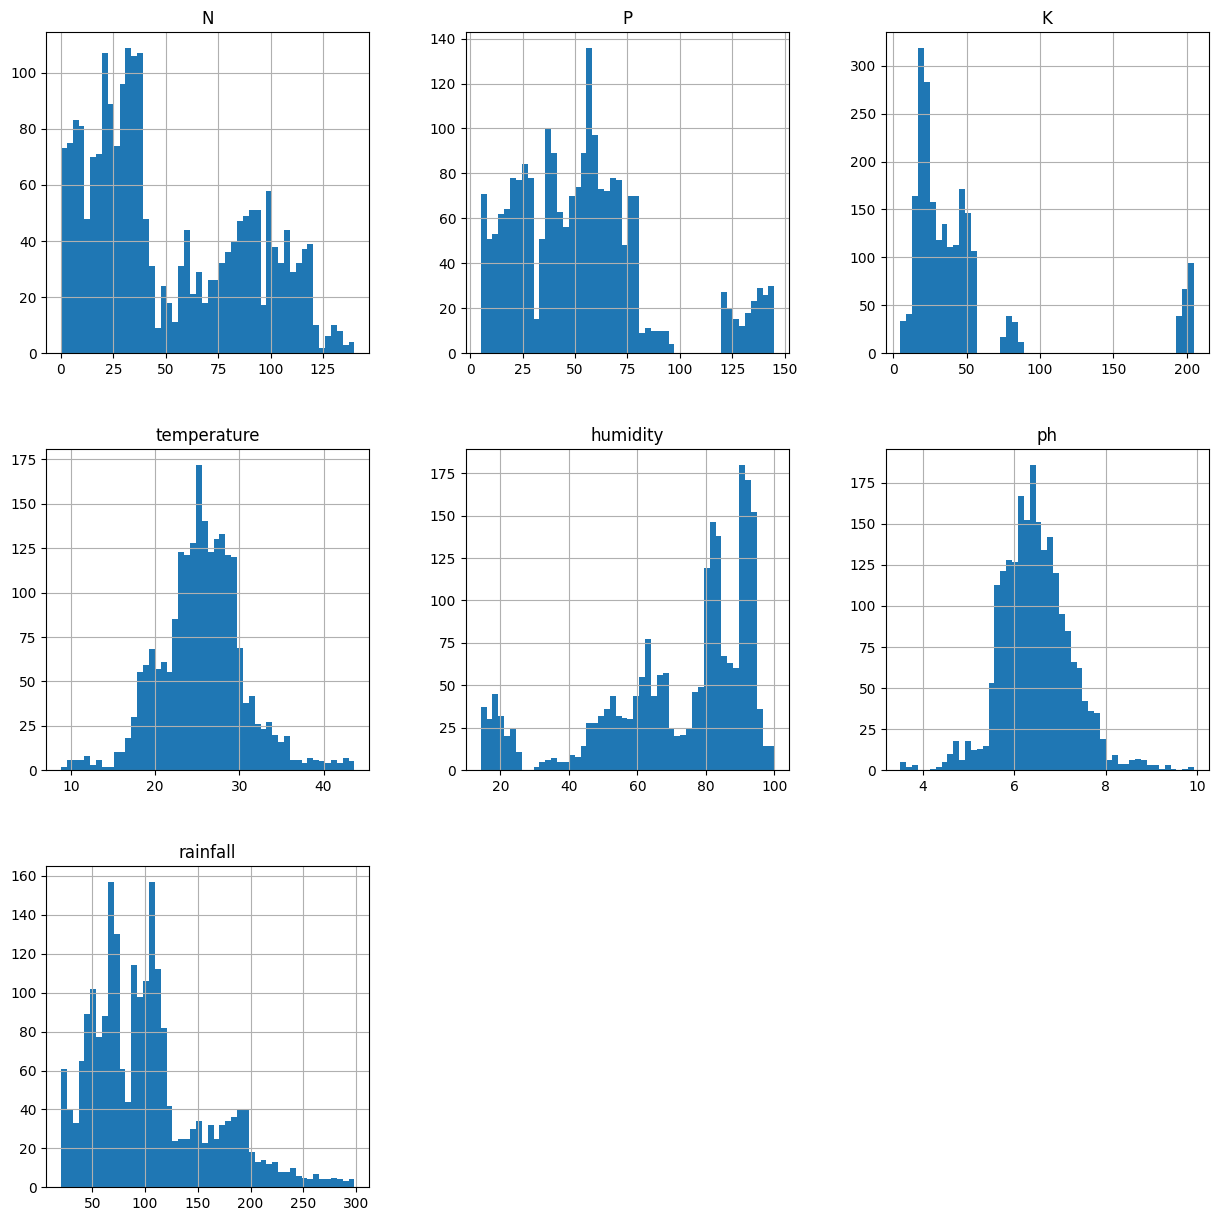

In [10]:
atributos = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']
data[atributos].hist(bins=50, figsize=(15,15))
plt.show()

## EDA. Relación de variables 

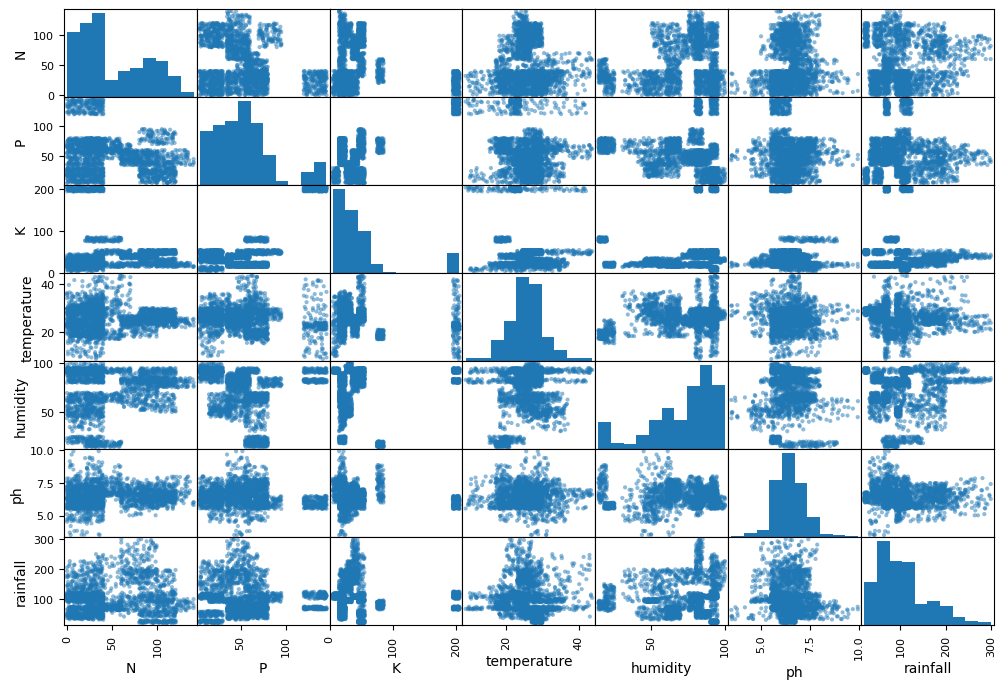

In [11]:
atributos = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']
scatter_matrix(data[atributos], figsize=(12, 8))
plt.show()

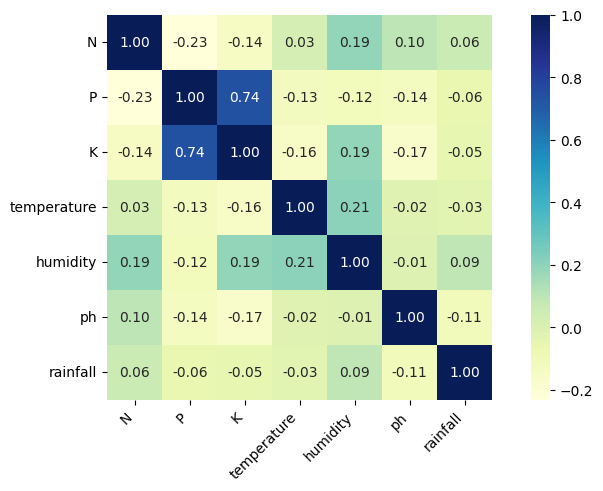

In [12]:
datac = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].corr()

# Hacemos un mapa de calor para ver la relación entre las variables de una manera más amena

plt.figure(figsize=(10, 5))

sns.heatmap(datac, annot=True, cmap="YlGnBu", annot_kws={"size": 10}, cbar=True, square=True, fmt='.2f')
plt.xticks(rotation=45, horizontalalignment='right')
plt.yticks(rotation=0)
plt.show()

## EDA. Identificacion de Patrones y Tendencias

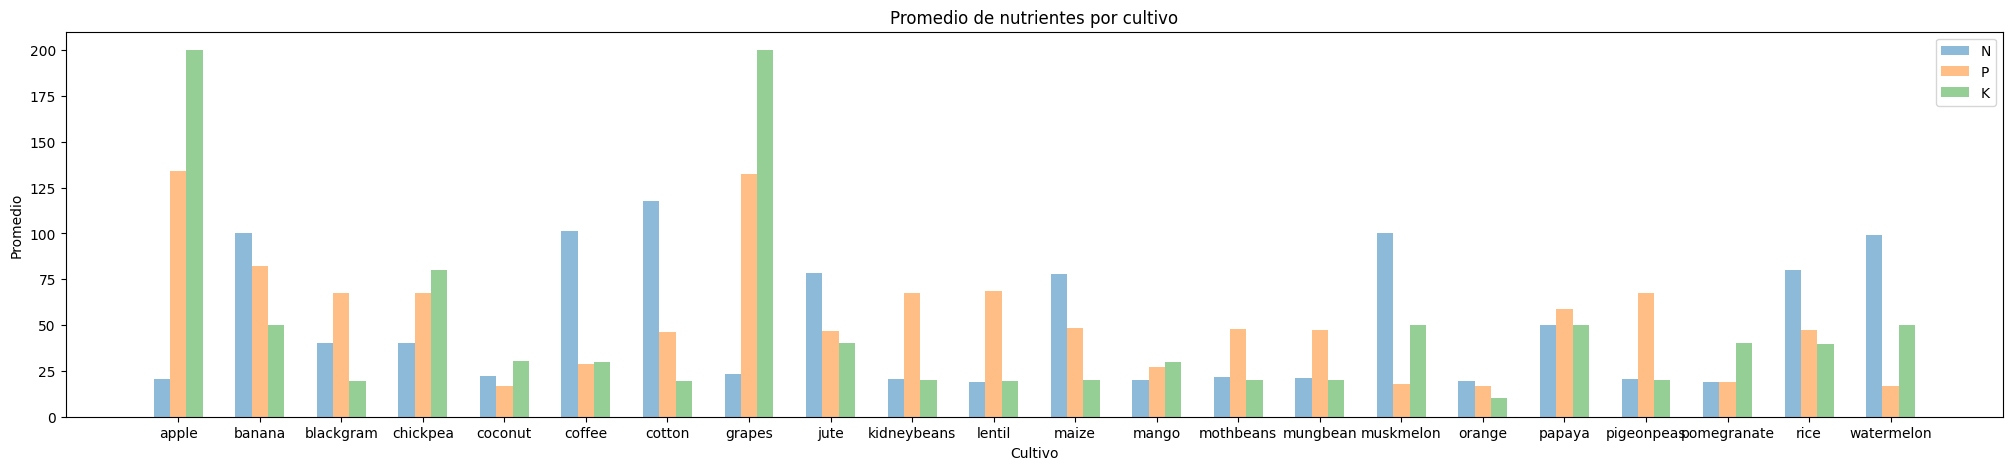

In [13]:
# figura con dimensiones personalizadas
fig, ax = plt.subplots(figsize=(25, 5))

# Agrupa tus datos por 'label' y calcula el promedio de 'N', 'P' y 'K'
grouped = data.groupby(['label'])[['N','P','K']].mean().reset_index()

# Crea una lista de 'label' que serian los cultivos
tipo = grouped['label'].unique()

# Crea un array para las posiciones de las barras en el eje X
bar_positions = np.arange(len(tipo))

# Calcula el ancho de cada barra
bar_width = 0.8 / len(grouped.columns)

# Crea las barras para cada item
for i, col in enumerate(grouped.columns[1:]):
    plt.bar(bar_positions + i * bar_width, grouped[col], width=bar_width, alpha=0.5, label=col)

# Añade las etiquetas para el eje X
plt.xticks(bar_positions + (len(grouped.columns) - 2) * bar_width / 2, tipo)

# Añade un título y etiquetas para los ejes
plt.title('Promedio de nutrientes por cultivo')
plt.xlabel('Cultivo')
plt.ylabel('Promedio')

# Añade la leyenda
plt.legend()

# Muestra el gráfico
plt.show()

In [14]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

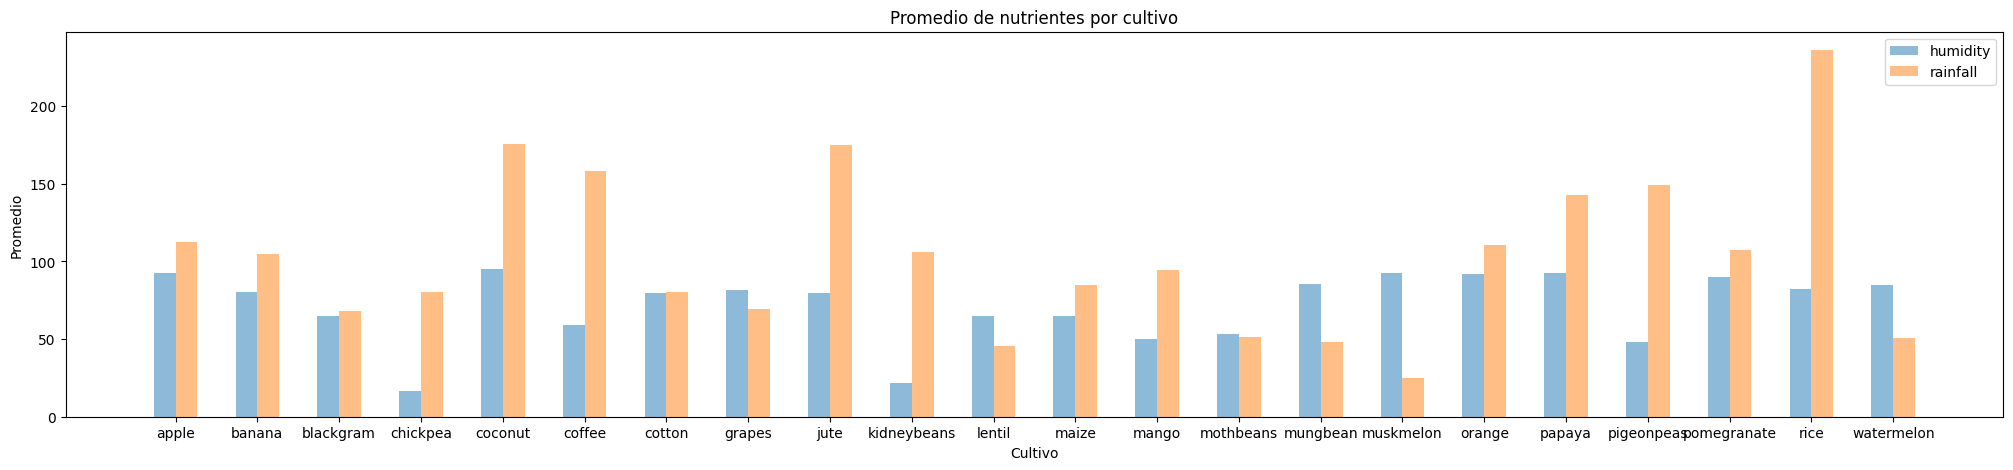

In [15]:
# figura con dimensiones personalizadas
fig, ax = plt.subplots(figsize=(25, 5))

# Agrupa tus datos por 'label' y calcula el promedio de 'humidity' y 'rainfall'
grouped = data.groupby(['label'])[['humidity','rainfall']].mean().reset_index()

# Crea una lista de 'label' que serian los cultivos
tipo = grouped['label'].unique()

# Crea un array para las posiciones de las barras en el eje X
bar_positions = np.arange(len(tipo))

# Calcula el ancho de cada barra
bar_width = 0.8 / len(grouped.columns)

# Crea las barras para cada item
for i, col in enumerate(grouped.columns[1:]):
    plt.bar(bar_positions + i * bar_width, grouped[col], width=bar_width, alpha=0.5, label=col)

# Añade las etiquetas para el eje X
plt.xticks(bar_positions + (len(grouped.columns) - 2) * bar_width / 2, tipo)

# Añade un título y etiquetas para los ejes
plt.title('Promedio de nutrientes por cultivo')
plt.xlabel('Cultivo')
plt.ylabel('Promedio')

# Añade la leyenda
plt.legend()

# Muestra el gráfico
plt.show()

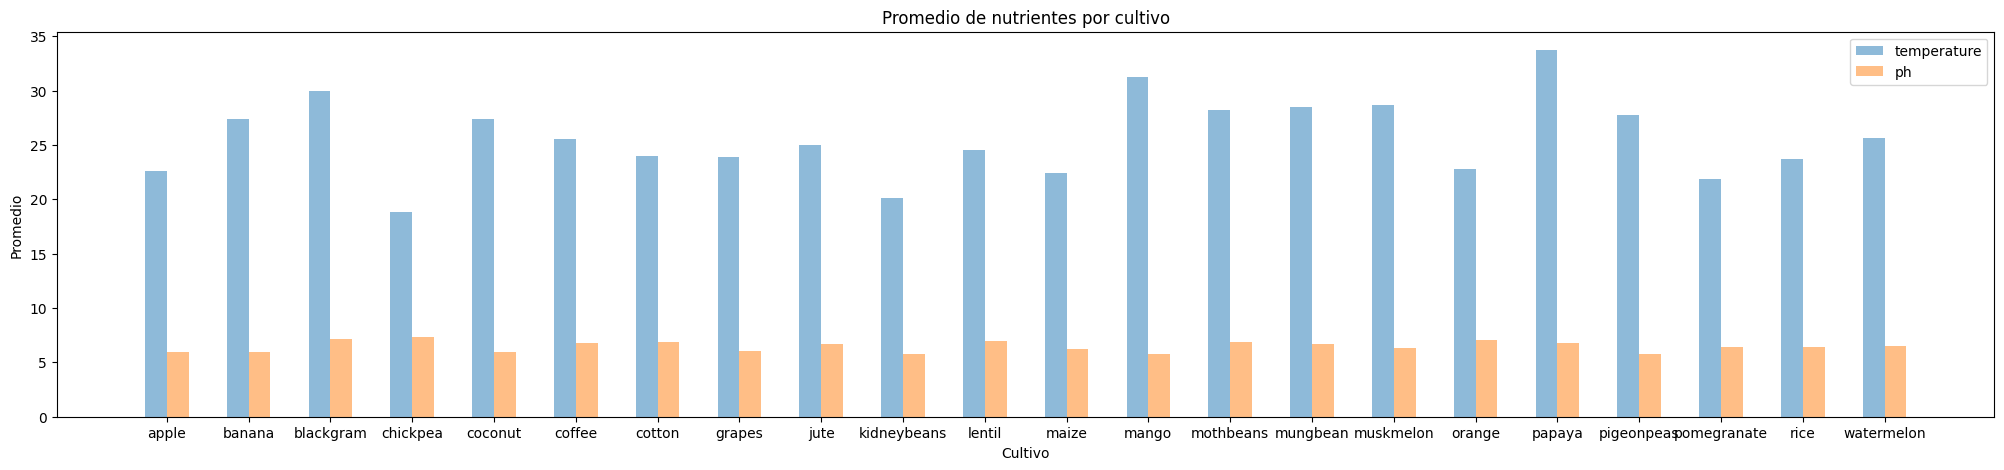

In [16]:
# figura con dimensiones personalizadas
fig, ax = plt.subplots(figsize=(25, 5))

# Agrupa tus datos por 'label' y calcula el promedio de 'temperature' y 'ph'
grouped = data.groupby(['label'])[['temperature', 'ph']].mean().reset_index()

# Crea una lista de 'label' que serian los cultivos
tipo = grouped['label'].unique()

# Crea un array para las posiciones de las barras en el eje X
bar_positions = np.arange(len(tipo))

# Calcula el ancho de cada barra
bar_width = 0.8 / len(grouped.columns)

# Crea las barras para cada item
for i, col in enumerate(grouped.columns[1:]):
    plt.bar(bar_positions + i * bar_width, grouped[col], width=bar_width, alpha=0.5, label=col)

# Añade las etiquetas para el eje X
plt.xticks(bar_positions + (len(grouped.columns) - 2) * bar_width / 2, tipo)

# Añade un título y etiquetas para los ejes
plt.title('Promedio de nutrientes por cultivo')
plt.xlabel('Cultivo')
plt.ylabel('Promedio')

# Añade la leyenda
plt.legend()

# Muestra el gráfico
plt.show()

## Resumen por cultivo

In [17]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [18]:
# resumen interactivo por cada cultivo
@interact
def resumen(cultivos= list(data['label'].value_counts().index)):
    x = data[data['label'] == cultivos]

    print('------------------------------------------------')
    print('Requerimientos de N, P, K')
    print('Nitrogeno - Minimo: ', x['N'].min(), ', Promedio: ', x['N'].mean(), ', Maximo: ', x['N'].max())
    print('Fósforo   - Minimo: ', x['P'].min(), ', Promedio: ', x['P'].mean(), ', Maximo: ', x['P'].max())
    print('Potásio   - Minimo: ', x['K'].min(), ', Promedio: ', x['K'].mean(), ', Maximo: ', x['K'].max())
    print('------------------------------------------------')
    print('Requerimientos Climaticos y Suelos')
    print('Temperatura   - Minimo: ', round(x['temperature'].min(),2), ', Promedio: ', round(x['temperature'].mean(),2), ', Maximo: ', round(x['temperature'].max(),2))
    print('Humedad       - Minimo: ', round(x['humidity'].min(),2), ', Promedio: ', round(x['humidity'].mean(),2), ', Maximo: ', round(x['humidity'].max(),2))
    print('PH            - Minimo: ', round(x['ph'].min(),2), ', Promedio: ', round(x['ph'].mean(),2), ', Maximo: ', round(x['ph'].max(),2))
    print('Precipitación - Minimo: ', round(x['rainfall'].min(),2), ', Promedio: ', round(x['rainfall'].mean(),2), ', Maximo: ', round(x['rainfall'].max(),2))

interactive(children=(Dropdown(description='cultivos', options=('rice', 'maize', 'jute', 'cotton', 'coconut', …

## Machine Learning

## Modelo de Regresion Logistica

In [19]:
# cortar la data para el modelo predictivo

y = data['label']
x = data.drop(['label'], axis=1)

print('dimensiones de x:', x.shape)
print('dimensiones de y:', y.shape)

dimensiones de x: (2200, 7)
dimensiones de y: (2200,)


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

print('dimensiones de x train:', x_train.shape)
print('dimensiones de x test:', x_test.shape)
print('dimensiones de y train:', y_train.shape)
print('dimensiones de y test:', y_test.shape)

dimensiones de x train: (1650, 7)
dimensiones de x test: (550, 7)
dimensiones de y train: (1650,)
dimensiones de y test: (550,)


In [21]:
# entrenar el modelo 1 con regresion logistica
modelo1 = LogisticRegression()
modelo1.fit(x_train, y_train)
y_pred1 = modelo1.predict(x_test)

In [22]:
print('Exactitud en el set de entrenamiento: {0: .2f}'.format(modelo1.score(x_train, y_train)))
print('Exactitud en el set de testeo: {0: .2f}'.format(modelo1.score(x_test, y_test)))

Exactitud en el set de entrenamiento:  0.97
Exactitud en el set de testeo:  0.97


In [23]:
# reporte de clasificacion
cr1 = classification_report(y_test, y_pred1)
print(cr1)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        24
      banana       1.00      1.00      1.00        24
   blackgram       0.85      0.85      0.85        26
    chickpea       1.00      1.00      1.00        28
     coconut       1.00      1.00      1.00        19
      coffee       1.00      1.00      1.00        24
      cotton       0.91      1.00      0.95        21
      grapes       1.00      1.00      1.00        24
        jute       0.88      1.00      0.93        28
 kidneybeans       0.96      1.00      0.98        23
      lentil       0.94      0.94      0.94        17
       maize       0.95      0.91      0.93        22
       mango       1.00      1.00      1.00        24
   mothbeans       0.86      0.86      0.86        29
    mungbean       1.00      1.00      1.00        27
   muskmelon       1.00      1.00      1.00        27
      orange       1.00      1.00      1.00        27
      papaya       1.00    

In [24]:
# predecimos los valores del modelo 1

prediccion = modelo1.predict((np.array([[90,40,40,20,80,7,200]])))
print('El cultivo sugerido para determinadas condiciones climáticas es:', prediccion)

# predecimos los valores del modelo 1

prediccion = modelo1.predict((np.array([[100,80,10,40,60,6,150]])))
print('El cultivo sugerido para determinadas condiciones climáticas es:', prediccion)

El cultivo sugerido para determinadas condiciones climáticas es: ['rice']
El cultivo sugerido para determinadas condiciones climáticas es: ['maize']


In [25]:
joblib.dump(modelo1, "modelo1.pkl")

['modelo1.pkl']

In [26]:
# modelo entrenado listo para despliegue
# model = joblib.load("my_model.pkl")

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [29]:
data1 = data.copy()

In [30]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [32]:
data1.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
# cambiando tipos de datos
data1['N'] = data1['N'].astype(str)
data1['P'] = data1['P'].astype(str)
data1['K'] = data1['K'].astype(str)
data1['temperature'] = data1['temperature'].astype(str)
data1['humidity'] = data1['humidity'].astype(str)
data1['ph'] = data1['ph'].astype(str)
data1['rainfall'] = data1['rainfall'].astype(str)


# borrando duplicados
data1 = data1.drop_duplicates(subset='label', keep='first')

# Combinar los valores de las columnas en una sola columna
data1['features'] = data1[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].apply(lambda x: ', '.join(x), axis=1)

data1.drop(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'],axis=1,inplace=True)

In [36]:
# Exportar data limpia de juegos
data1.to_csv('data_features.csv', index=False)

In [127]:
label = 'grapes'

In [142]:
    # se carga los datasets que se va a utilizar para dos dataframes distintos
data = pd.read_csv('data_features.csv')
    
    # crear una matriz de características de los cultivos
tfidv = TfidfVectorizer(min_df=2, max_df=0.7, token_pattern=r'\b[a-zA-Z0-9]\w+\b')
data_vector = tfidv.fit_transform(data['features'])

data_vector_df = pd.DataFrame(data_vector.toarray(), index=data['label'], columns = tfidv.get_feature_names_out())

    # calcular la similitud coseno entre los juegos en la matriz de características
vector_similitud_coseno = cosine_similarity(data_vector_df.values)

cos_sim_df = pd.DataFrame(vector_similitud_coseno, index=data_vector_df.index, columns=data_vector_df.index)

juego_simil = cos_sim_df.loc[label]

simil_ordenada = juego_simil.sort_values(ascending=False)
resultado = simil_ordenada.head(4).reset_index()

res_list = res.tolist()
res_string = ', '.join(map(str, res_list))
res_string

'pomegranate, cotton, pigeonpeas'